# Mid Hackathon Submission: (Algorithm: XGBoost, Naive Bayes, Logistic Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# importing dataset

df_train_full = pd.read_csv('./Train_data.csv')
df_test_full = pd.read_csv('./Test_data.csv')

In [3]:
df_train_full

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,49.0,8.3,4.5,1.8,3.9,46.6,0.0,0.1,0.0,0.8,1.2,70.2,0.6,0.7,1.3,0.5,0.3,0.3,0.6,1
1097,35.0,5.5,1.5,0.5,1.4,36.0,0.4,1.1,33.3,0.1,0.1,100.0,0.1,0.6,0.7,0.2,0.1,0.0,0.1,1
1098,65.0,13.2,5.0,2.0,5.0,41.3,0.1,0.3,35.0,0.8,1.0,76.9,0.6,1.0,1.6,1.1,0.7,0.3,0.8,0
1099,55.0,14.9,4.1,1.7,4.1,41.7,0.1,0.1,37.5,0.6,0.8,76.1,0.5,1.0,1.5,1.5,0.7,0.2,0.8,0


In [4]:
df_train_full.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,59.008156,16.928284,6.502344,2.511125,5.645747,43.912555,0.241959,0.767455,19.050425,1.241914,1.741848,70.495847,0.958240,1.937014,2.891927,1.472706,0.589403,0.344204,1.150499,0.499546
std,17.236886,8.034209,4.163856,1.611502,3.422292,6.106910,0.363008,1.017214,15.513640,0.937585,1.272047,10.381068,0.771344,1.342627,2.039694,1.376592,0.386147,0.418840,0.687706,0.500227
min,11.000000,3.100000,1.100000,0.400000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,46.223257,10.492268,3.587756,1.400000,3.200000,40.000000,0.000000,0.000000,0.000000,0.600000,0.900000,64.900000,0.400000,1.000000,1.400000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,59.387147,15.386486,5.200000,2.000000,4.600000,43.652785,0.100000,0.300000,22.600000,1.000000,1.400000,71.502462,0.700000,1.600000,2.273596,1.041951,0.500000,0.200000,0.988945,0.000000
75%,76.000000,21.830403,8.300000,3.200000,6.900000,47.700000,0.400000,1.195634,32.300000,1.600000,2.200000,77.436718,1.300000,2.500000,3.700000,1.900000,0.800000,0.400000,1.400000,1.000000
max,82.000000,40.900000,24.300000,9.000000,18.900000,73.700000,2.300000,6.500000,100.000000,7.500000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.200000,1.000000


In [5]:
df_train_full.isna().any()

GP         False
MIN        False
PTS        False
FGM        False
FGA        False
FG%        False
3P Made    False
3PA        False
3P%        False
FTM        False
FTA        False
FT%        False
OREB       False
DREB       False
REB        False
AST        False
STL        False
BLK        False
TOV        False
Target     False
dtype: bool

<AxesSubplot:>

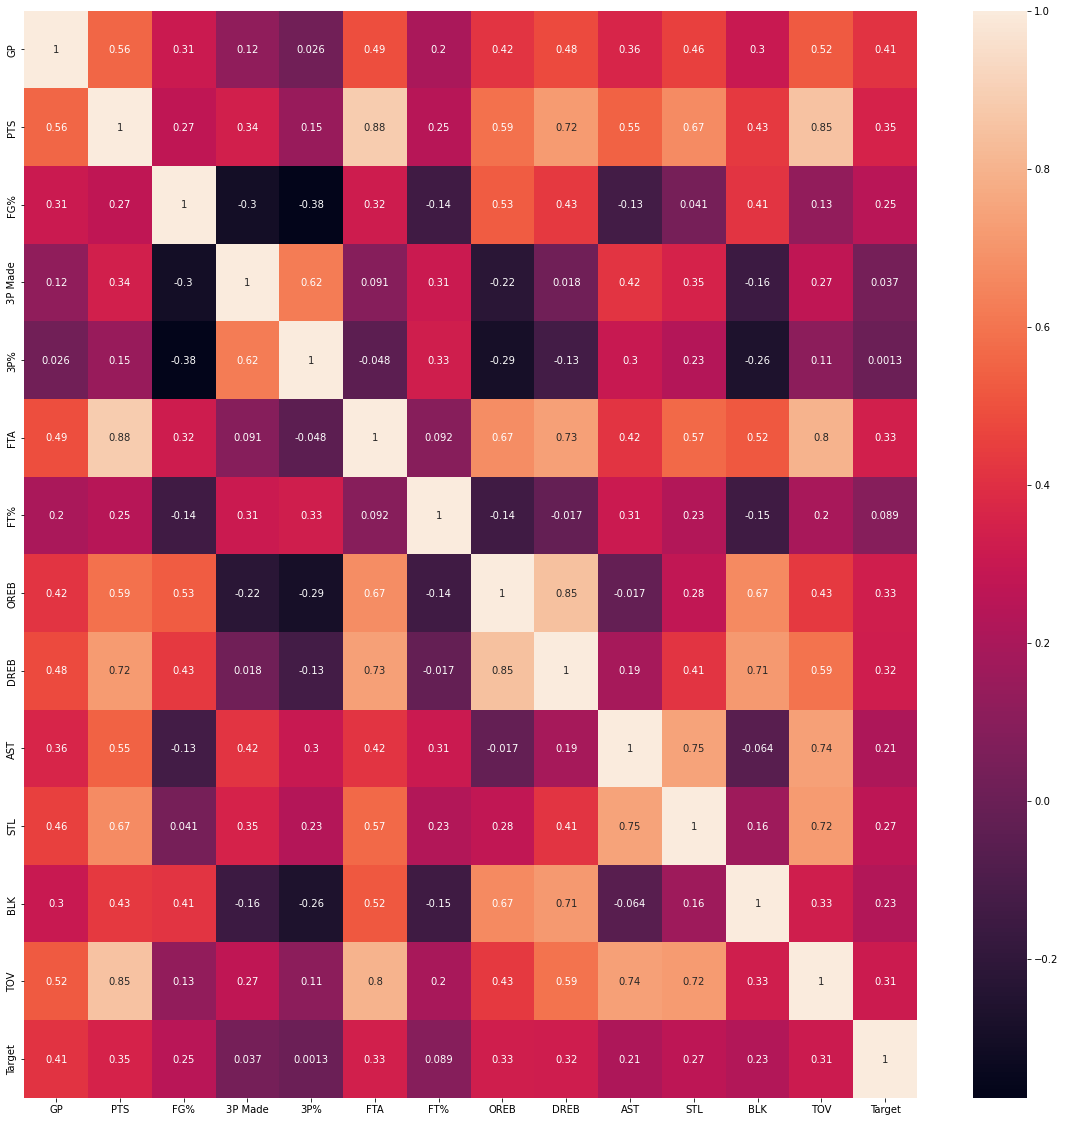

In [6]:
# dropping some highly correlated features from datasets

df_train_full = df_train_full.drop(['FGM', 'FGA', '3PA', 'REB', 'MIN', 'FTM'], axis = 1)
df_test_full = df_test_full.drop(['FGM', 'FGA', '3PA', 'REB', 'MIN', 'FTM'], axis = 1)

plt.figure(figsize=(20, 20))
sns.heatmap(df_train_full.corr(), annot=True)

In [7]:
# splitting training and validation sets

X_train_full = df_train_full.drop(['Target'], axis = 1)
y_train_full = df_train_full['Target']

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25, random_state = 0)

In [8]:
y_train = y_train.values.reshape(-1,1)
y_valid = y_valid.values.reshape(-1,1)

In [11]:
# Normalizing all the columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_full = pd.DataFrame(scaler.fit_transform(X_train_full))
df_test_full = pd.DataFrame(scaler.transform(df_test_full))
    
X_train_full

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.000473,-0.745404,1.161089,-0.115640,1.995898,-0.740756,0.723198,0.183866,0.270478,-0.706926,-0.749803,0.133276,-0.946326
1,-1.625635,-0.745404,-1.410938,0.711163,0.435271,-0.662107,-1.474106,-0.853755,-0.623698,-0.779602,-0.749803,-0.583314,-1.382757
2,-0.638930,-0.481105,0.948119,-0.666842,-1.228537,0.124385,-0.866957,-0.724053,-0.847242,-0.488897,-0.231630,0.133276,-0.218941
3,1.218398,1.128711,-1.066909,2.915970,0.893141,1.225473,1.397808,-0.205242,-0.251125,1.764064,1.841062,-0.583314,1.526782
4,-0.058515,-0.168753,-1.181585,-0.666842,0.383680,1.068175,-0.847682,-0.594350,-0.921757,0.310541,1.322889,-0.344450,0.799398
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,-0.580888,-0.481105,0.440266,-0.666842,-1.228537,-0.426159,-0.028512,-0.464647,-0.921757,-0.706926,-0.749803,-0.105587,-0.800849
1097,-1.393469,-1.201919,-1.296261,0.435562,0.918937,-1.291300,2.843403,-1.113161,-0.996271,-0.924954,-1.267976,-0.822177,-1.528234
1098,0.347776,-0.360970,-0.427997,-0.391241,1.028567,-0.583457,0.617187,-0.464647,-0.698213,-0.270869,0.286543,-0.105587,-0.509895
1099,-0.232639,-0.577214,-0.362468,-0.391241,1.189789,-0.740756,0.540089,-0.594350,-0.698213,0.019836,0.286543,-0.344450,-0.509895


In [12]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 5000, random_state = 0)

In [13]:
xgb.fit(X_train, y_train, early_stopping_rounds = 15, eval_set = [(X_valid, y_valid)])

[0]	validation_0-logloss:0.64574
[1]	validation_0-logloss:0.62019
[2]	validation_0-logloss:0.60629
[3]	validation_0-logloss:0.59468
[4]	validation_0-logloss:0.59087
[5]	validation_0-logloss:0.58975
[6]	validation_0-logloss:0.58201
[7]	validation_0-logloss:0.57789


/home/siddhivinayak/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.57196
[9]	validation_0-logloss:0.57291
[10]	validation_0-logloss:0.57275
[11]	validation_0-logloss:0.58011
[12]	validation_0-logloss:0.57846
[13]	validation_0-logloss:0.58345
[14]	validation_0-logloss:0.58238
[15]	validation_0-logloss:0.57906
[16]	validation_0-logloss:0.58706
[17]	validation_0-logloss:0.58585
[18]	validation_0-logloss:0.58788
[19]	validation_0-logloss:0.58958
[20]	validation_0-logloss:0.59125
[21]	validation_0-logloss:0.58934
[22]	validation_0-logloss:0.58843
[23]	validation_0-logloss:0.59409


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [14]:
from sklearn.metrics import accuracy_score
preds = xgb.predict(X_valid)
print(accuracy_score(y_valid, preds))

0.7028985507246377


In [15]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(xgb, X_train_full, y_train_full, cv = 4))

[0.71014493 0.70545455 0.69090909 0.71272727]


In [16]:
preds = xgb.predict(df_test_full)
print(preds.shape)
output = pd.DataFrame({'prediction':preds})
output.to_csv('submission2_xgboost.csv', index = False)

(555,)


# Naive Bayes Approach

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [18]:
y_pred = gnb.fit(X_train, y_train).predict(X_valid)

print(cross_val_score(gnb, X_train_full, y_train_full, cv = 5))

[0.67873303 0.69090909 0.67727273 0.66363636 0.67272727]


/home/siddhivinayak/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Doesn't seem to be a good approach here.

In [19]:

preds_N = gnb.predict(df_test_full)
print(preds_N.shape)
output = pd.DataFrame({'prediction':preds_N})
output.to_csv('submission3_naiveBayes.csv', index = False)

(555,)


/home/siddhivinayak/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


###  XGBOOST  GAVE SCORE OF 85.7% ON TEST DATA (SUBMISSION TO HACKATHON)
### GAUSSIAN NAIVE BAYES GAVE SCORE OF 72.5% ON TEST DATA (SUBMISSION TO HACKATHON)

In [ ]:
sns.pairplot(X_train_full)

# Trying LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_full, y_train_full)
print(cross_val_score(logreg, X_train_full, y_train_full, cv = 4))

[0.70652174 0.66909091 0.70545455 0.70181818]


In [21]:
preds_l = logreg.predict(df_test_full)
print(preds_N.shape)
output = pd.DataFrame({'prediction':preds_l})
output.to_csv('submission_Log.csv', index = False)

(555,)


### Very poor prediction score of logistic regression (62%)